<a href="https://colab.research.google.com/github/jeongin-Lee/INBIG-ML/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-2 데이터 전처리   

---


## key word : <데이터 전처리, 표준점수, 브로드캐스팅>

1.   올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거쳐야 함.

2.   전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배움.


## 1) 넘파이로 데이터 준비하기 -> np.cloumn.stack() / np.concatenate()

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5,
                10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3],[4,5,6]))  # column stack 사용해보기, 꼭 ! 튜플로 전달

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # concatenate 사용해보기, 꼭 ! 튜플로 전달
print(fish_target[:5])

[1. 1. 1. 1. 1.]


## 2) 사이킷런으로 훈련 세트와 테스트 세트 나누기


*   train_test_split() : model_Selection 모듈 아래 있음
*   기본 25%를 테스트 시트로 떼어냄.(statify = 타깃데이터 라고 설정시  클래스 비율에 따라 훈련데이터와 테스트데이터를 나눔)





In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,random_state=42)

In [ ]:
print(train_input.shape, test_input.shape) # 넘파이 배열의 크기는 튜플 형태로 표현

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape) # 넘파이 배열의 크기는 튜플 형태로 표현 + 1차원일 때 튜플은 원소뒤에 콤마가 추가됨.

(36,) (13,)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)
print(test_target.shape,test_target)   # 아까보다 빙어가 하나 늘어남 - why? stratify 매개변수에 타깃 데이터를 전달하여 클래스 비율에 맞게 데이터를 나눠줌
#  기존 (도미:빙어 = 3.3:1)  / 현재(도미:빙어=2.25:1) /원본데이터 (도미:빙어= 2.5:1) 

(13,) [0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 3) 수상한 도미 한 마리 -> 기준을 맞춰라 !  

*   x축과 y축의 다른 범위 크기가 거리에 영향을 줌.
*   정규화를 통한 변화량의 기준 맞춰주기
두 특성의 범위(스케일)이 다르면 알고리즘이 올바르게 예측할 수 없음.
거리 기반 알고리즘일 때는 특히 더 심각,, 이 때 필요한 것이 데이터 전처리 ! 
#### 표준점수 : 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져있는지를 나타냄 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

1.0

In [ ]:
print(kn.predict([[25,150]]))   # 도미 데이터에 가깝지만 결과는 빙어로 나오는 이유 ?! -> 다음 셀에서 산점도로 확인

[0.]


In [ ]:
distances, indexes = kn.kneighbors([[25,150]])  # kneighborsclassifier는 kneighbors 메서드를 제공함.- 이웃까지의 거리와 이웃 샘플의 인덱스를 반환함.
print(distances, indexes)  # 기본 이웃값 5개이기 때문에 5개를 반환함.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


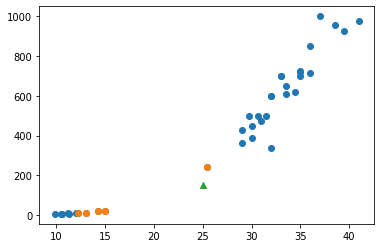

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(train_input[indexes,0],train_input[indexes, 1])
plt.scatter(25,150, marker='^')
# 도미데이터에 가깝지만 빙어로 나오는 이유는 y값과 x값의 범위의 크기가 달라서임을 알 수 있음.

In [ ]:
print(train_target[indexes], distances)

[[1. 0. 0. 0. 0.]] [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


Text(0.5, 0, 'weight')

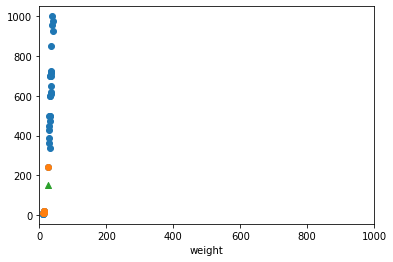

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(train_input[indexes,0],train_input[indexes, 1])
plt.scatter(25,150, marker='^')
plt.xlim((0,1000))
plt.xlabel('length')
plt.xlabel('weight')

In [ ]:
mean = np.mean(train_input, axis=0)  # 열기준으로 계산 -> axis=0
std = np.std(train_input, axis=0)

In [ ]:
# 넘파이의 브로드캐스팅을 통한 간단한 계산 이용
train_scaled = (train_input - mean) / std

## 4) 전처리 데이터로 모델 훈련하기


*   표준점수로 변환한 train_scaled를 활용한 모델 훈련
*   새로운 샘플도 훈련세트의 평균을 이용하여 표준점수로 변환해야 함.


Text(0.5, 0, 'weight')

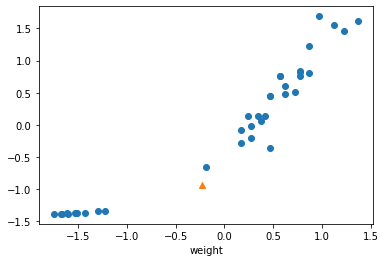

In [ ]:
new= ([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel('length')
plt.xlabel('weight')
# x축 y축의 범위가 -1.5 ~ 1.5 사이로 축소됨 + 아까의 산점도와 형태는 비슷함.

In [ ]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input-mean) / std
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict(([new]))) # 결과값이 도미로 올바르게 나옴 ! 

[1.]


Text(0.5, 0, 'weight')

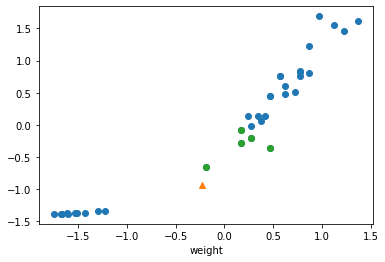

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1])
plt.xlabel('length')
plt.xlabel('weight')

# 표준점수로 변환 후 거리를 측정하였으므로 가장 가까운 이웃에 변화가 생겼을 것으로 기대할 수 있음.
# 가장 가까운 샘플들은 빙어가 아닌 도미로 확인됨 ! 
# 기존의 산점도에서는 y값의 변화량의 영향이 매우 커 빙어로측정된 반면 표준점수로 데이터 전처리 후에는 특정 특성값의 스케일에 민감하지 않고 안정적인 예측이 가능한 모델을 만듬 ! 
